In [38]:
import numpy as np
import pandas as pd 
import autosklearn.regression
import matplotlib.pyplot as plt


In [2]:
merged_all = pd.read_csv('./data/merged_all2.csv')

In [3]:
merged_all.head()

,Unnamed: 0,Store,Dept,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size,Day,Month,Year,Holiday
0,0,1,1,24924.50,False,42.31,2.572,0.0,0.0,0.0,...,0.0,211.096358,8.106,False,A,151315,Friday,February,2010,None
1,1,1,1,46039.49,True,38.51,2.548,0.0,0.0,0.0,...,0.0,211.242170,8.106,True,A,151315,Friday,February,2010,Super Bowl
2,2,1,1,41595.55,False,39.93,2.514,0.0,0.0,0.0,...,0.0,211.289143,8.106,False,A,151315,Friday,February,2010,None
3,3,1,1,19403.54,False,46.63,2.561,0.0,0.0,0.0,...,0.0,211.319643,8.106,False,A,151315,Friday,February,2010,None
4,4,1,1,21827.90,False,46.50,2.625,0.0,0.0,0.0,...,0.0,211.350143,8.106,False,A,151315,Friday,March,2010,None


In [4]:
X = merged_all.iloc[:,0:]

In [5]:
X = X.drop(columns=['Weekly_Sales'], axis=1)

In [6]:
X = X.drop(columns=['Day'], axis=1)

In [7]:
X['Store'] = X['Store'].astype("category")

In [8]:
X['Dept'] = X['Dept'].astype("category")

In [9]:
X['Type'] = X['Type'].astype("category")

In [10]:
X['Month'] = X['Month'].astype("category")

In [11]:
X['Year'] = X['Year'].astype("category")

In [12]:
X['Holiday'] = X['Holiday'].astype("category")

In [13]:
y = merged_all['Weekly_Sales']

In [14]:
autoMLRegression = autosklearn.regression.AutoSklearnRegressor(time_left_for_this_task=600)

In [15]:
from sklearn.model_selection import train_test_split

In [ ]:
autosklearn.__version__

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [17]:
autoMLRegression.fit(X=X_train, y=y_train, X_test=X_test, y_test=y_test,)

AutoSklearnRegressor(per_run_time_limit=60, time_left_for_this_task=600)

In [18]:
autoMLRegression.get_models_with_weights()

[(1.0,
  SimpleRegressionPipeline({'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'no_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'no_coalescense', 'data_preprocessing:numerical_transformer:imputation:strategy': 'mean', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'robust_scaler', 'feature_preprocessor:__choice__': 'feature_agglomeration', 'regressor:__choice__': 'gradient_boosting', 'data_preprocessing:numerical_transformer:rescaling:robust_scaler:q_max': 0.7727512096172742, 'data_preprocessing:numerical_transformer:rescaling:robust_scaler:q_min': 0.22461598115758682, 'feature_preprocessor:feature_agglomeration:affinity': 'manhattan', 'feature_preprocessor:feature_agglomeration:linkage': 'complete', 'feature_preprocessor:feature_agglomeration:n_clusters': 21, 'feature_preprocessor:feature_agglomeration:pooling_func': 'max', 'regressor:gradient_boosting:early_stop': 'train', 'regressor:gradi

In [19]:
print(autoMLRegression.leaderboard())

          rank  ensemble_weight               type      cost   duration
model_id                                                               
11           1              1.0  gradient_boosting  0.049897  45.919165


In [20]:
print(autoMLRegression.show_models())

[(1.000000, SimpleRegressionPipeline({'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'no_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'no_coalescense', 'data_preprocessing:numerical_transformer:imputation:strategy': 'mean', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'robust_scaler', 'feature_preprocessor:__choice__': 'feature_agglomeration', 'regressor:__choice__': 'gradient_boosting', 'data_preprocessing:numerical_transformer:rescaling:robust_scaler:q_max': 0.7727512096172742, 'data_preprocessing:numerical_transformer:rescaling:robust_scaler:q_min': 0.22461598115758682, 'feature_preprocessor:feature_agglomeration:affinity': 'manhattan', 'feature_preprocessor:feature_agglomeration:linkage': 'complete', 'feature_preprocessor:feature_agglomeration:n_clusters': 21, 'feature_preprocessor:feature_agglomeration:pooling_func': 'max', 'regressor:gradient_boosting:early_stop': 'train', 'regressor:gr

In [24]:
from joblib import dump, load

In [25]:
dump(autoMLRegression, 'regModel.joblib')

['regModel.joblib']

In [27]:
predictions = autoMLRegression.predict(X_test)

In [26]:
from sklearn import metrics

In [28]:
metrics.explained_variance_score(y_test, predictions)

0.946326876496138

In [31]:
mean_abs_error = metrics.mean_absolute_error(y_test, predictions)
mean_abs_error

2922.6697809985467

In [33]:
mean_y = y_test.mean()
mean_y

15976.849223758072

In [34]:
mean_abs_error/mean_y

0.18293154927270927

In [41]:
train_predictions = autoMLRegression.predict(X_train)

Text(0.5, 1.0, 'Predictions vs. Ground Truth')

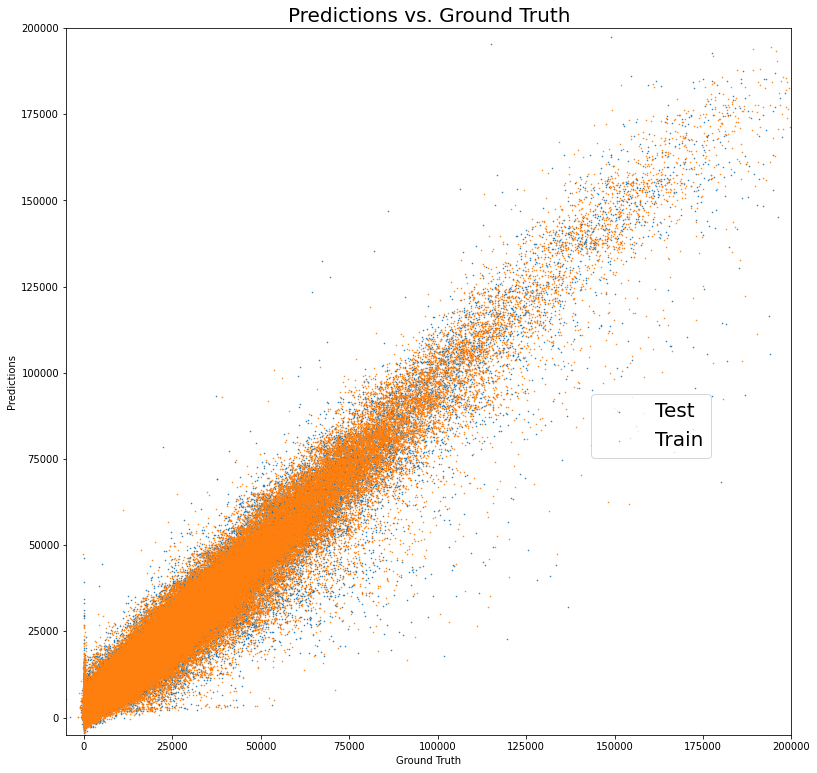

In [108]:
fig, ax = plt.subplots()
fig.set_size_inches(13,13)
ax.scatter(y_test, predictions,s=.3, label='Test')
ax.scatter(y_train, train_predictions, s=.3, label='Train')
ax.set_ylabel('Predictions')
ax.set_xlabel('Ground Truth')
ax.set_xlim(-5000,200000)
ax.set_ylim(-5000,200000)
fig.legend(loc=9, bbox_to_anchor=(0.5, 0., 0.5, 0.5), prop={'size': 20})
ax.set_title('Predictions vs. Ground Truth', fontdict={'fontsize': 20})